# Image loading and resizing

**Importing Libraries**

In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from tqdm.notebook import tqdm
from IPython.display import display, HTML

### Lego dataset

In [67]:
# Define the path to the lego dataset DATA directory
data_path = os.getcwd() + '/DATA/'

Some things to notice about the dataset:
- It is formed by 200x200 pixel images.
- They are in .PNG format: supports 32-bit RGBA colors and has the ability to use transparency and or opacity, as opposed to JPG where by default it will retain a white/blank background.
- We have 6379 different images in the dataset: 15 classes with 400 images and one with 379.

Here is an example:

(-0.5, 199.5, 199.5, -0.5)

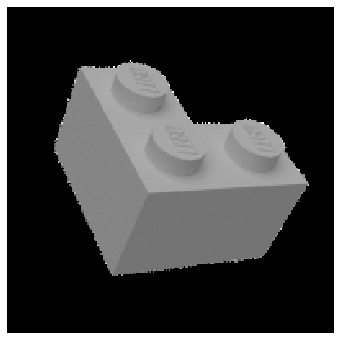

In [57]:
# Take one image at random
im = data_path + '2357 Brick corner 1x2x2/201706171206-0048.png'

image = Image.open(im).convert('L')
image = np.asarray(image).astype('uint8')

fig, ax = plt.subplots(figsize = (6, 6))
ax.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax.axis('off')

Now we will read the whole dataset and store it in a simple DataFrame:

In [66]:
def read_all_data(path):
    ''' Function that takes a path to a directory and reads all the images and stores them as a 
        pandas dataframe.
    ----------
    PARAMETERS
    - path: string indicating the full path of the parent directory
    ----------
    RETURNS
    - df200, df128, df64: pd.DataFrame with all the flattened grayscale images read
    
    '''
    # Loop through all the class labels
    for it, label in enumerate(os.listdir(data_path)):
        # Beware of hidden files in the directory
        if label[0] != '.':
            # Full path to the different sub-directories
            label_dir = data_path + label + '/'
            
            for i, im in enumerate(os.listdir(label_dir)):
                
                try:
                    # Open the image and convert the PNG to grayscale
                    image = Image.open(label_dir + im).convert('L')
                    
                    # Normal 200x200 resolution (no scaling)
                    im200 = list(np.asarray(image).flatten().astype('uint8'))
                    im200.append(label)
                    
                    # Downsized 128x128 resolution
                    im128 = image.resize((128, 128), Image.ANTIALIAS)
                    im128 = list(np.asarray(im128).flatten().astype('uint8'))
                    im128.append(label)
                    
                    # Downsized 64x64 resolution
                    im64 = image.resize((64, 64), Image.ANTIALIAS)
                    im64 = list(np.asarray(im64).flatten().astype('uint8'))
                    im64.append(label)
                    
                    # Create variables if first iteration
                    if i == 0:
                        m200 = im200
                        m128 = im128
                        m64 = im64
                    # Else append it to the matrix
                    else:
                        m200 = np.vstack((m200, im200))
                        m128 = np.vstack((m128, im128))
                        m64 = np.vstack((m64, im64))
                
                except:
                    print(f'Failed reading image: {im}')
            
            # Create pd.DataFrame variable if first iteration
            if it == 0: 
                df200 = pd.DataFrame(m200)
                df128 = pd.DataFrame(m128)
                df64 = pd.DataFrame(m64)
            # Else append it to the existing dataframe
            else: 
                df200 = df200.append(pd.DataFrame(m200))
                df128 = df128.append(pd.DataFrame(m128))
                df64 = df64.append(pd.DataFrame(m64))
                
    return (df200, df128, df64)      

In [68]:
%%time

df200, df128, df64 = read_all_data(data_path)

CPU times: user 1h 23min 40s, sys: 42min 20s, total: 2h 6min 1s
Wall time: 32min 53s


Take a look at the dataset (the 64x64 one for example):

In [69]:
df64.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1


Hence we have 4096 columns representing the 64x64 flattened pixels of every image, and the last column representing the label of the image.

Finally, store the dataframes into csv files in your working directory:

In [32]:
export200 = df200.to_csv(r'df200.csv', index = False, header = False)
export128 = df128.to_csv(r'df128.csv', index = False, header = False)
export64 = df64.to_csv(r'df64.csv', index = False, header = False)

### Scenes dataset

In [59]:
# Define the path to the scenes dataset SCENES directory
data_path = os.getcwd() + '/SCENES/'

Here is an example:

(-0.5, 255.5, 255.5, -0.5)

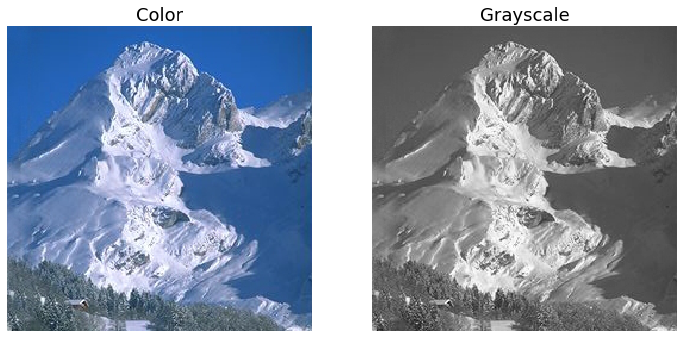

In [64]:
im = data_path + 'mountain/land161.jpg'

# Color image
image1 = Image.open(im)
image1 = np.asarray(image1).astype('uint8')
# Grayscale image
image2 = Image.open(im).convert('L')
image2 = np.asarray(image2).astype('uint8')

fig, axs = plt.subplots(1, 2, figsize = (12, 12))

axs[0].imshow(image1)
axs[0].set_title('Color', fontsize = 18)
axs[0].axis('off')

axs[1].imshow(image2, cmap = 'gray', vmin = 0, vmax = 255)
axs[1].set_title('Grayscale', fontsize = 18)
axs[1].axis('off')

Now we will read the whole dataset and store it in a simple DataFrame:

In [65]:
# Same function as before; now original size of images is 256x256 and not 200x200

def read_all_data(path):
    # Loop through all the class labels
    for it, label in enumerate(os.listdir(data_path)):
        # Beware of hidden files in the directory
        if label[0] != '.':
            # Full path to the different sub-directories
            label_dir = data_path + label + '/'
            
            for i, im in enumerate(os.listdir(label_dir)):
                
                try:
                    # Open the image and convert the PNG to grayscale
                    image = Image.open(label_dir + im).convert('L')
                    
                    # 256x256
                    im256 = list(np.asarray(image).flatten().astype('uint8'))
                    im256.append(label)
                    
                    # Downsized 128x128 resolution
                    im128 = image.resize((128, 128), Image.ANTIALIAS)
                    im128 = list(np.asarray(im128).flatten().astype('uint8'))
                    im128.append(label)
                    
                    # Downsized 64x64 resolution
                    im64 = image.resize((64, 64), Image.ANTIALIAS)
                    im64 = list(np.asarray(im64).flatten().astype('uint8'))
                    im64.append(label)
                    
                    # Create variables if first iteration
                    if i == 0:
                        m256 = im256
                        m128 = im128
                        m64 = im64
                    # Else append it to the matrix
                    else:
                        m256 = np.vstack((m256, im256))
                        m128 = np.vstack((m128, im128))
                        m64 = np.vstack((m64, im64))
                
                except:
                    pass
            
            # Create pd.DataFrame variable if first iteration
            if it == 0:
                df256 = pd.DataFrame(m256)
                df128 = pd.DataFrame(m128)
                df64 = pd.DataFrame(m64)
            # Else append it to the existing dataframe
            else:
                df256 = df256.append(pd.DataFrame(m256))
                df128 = df128.append(pd.DataFrame(m128))
                df64 = df64.append(pd.DataFrame(m64))
                
    return (df256, df128, df64)      

In [51]:
%%time

sc256, sc128, sc64 = read_all_data(data_path)

CPU times: user 13min 11s, sys: 4min 43s, total: 17min 55s
Wall time: 4min 42s


Finally, export the dataframes to .csv files:

In [52]:
export256 = sc256.to_csv(r'sc256.csv', header = False, index = False)
export128 = sc128.to_csv(r'sc128.csv', header = False, index = False)
export64 = sc64.to_csv(r'sc64.csv', header = False, index = False)